# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [Basketball Courts Data](https://www.data.act.gov.au/api/views/igti-4f4a/rows.csv)

[Bike Crash Data](https://www.data.act.gov.au/api/views/n2kg-qkwj/rows.csv)

`imports`, you've seen this before!

In [106]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [107]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [108]:
plt.rcParams['figure.figsize'] = (10, 5)

In [109]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [110]:
if os.path.isfile("Basketball_Courts.csv"):
    filepath = "Basketball_Courts.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/api/views/igti-4f4a/rows.csv"
    print("loading from the internet")

basketball_data = pd.read_csv(filepath)
print("done")

loading from the internet
done


In [111]:
if os.path.isfile("Cyclist_Crashes.csv"):
    filepath = "Cyclist_Crashes.csv"
    print("loading from file")
else:
    filepath = "https://www.data.act.gov.au/api/views/n2kg-qkwj/rows.csv"
    print("loading from the internet")

Cyclist_Crashes_data = pd.read_csv(filepath)
print("done")

loading from the internet
done


In [112]:
basketball_data.head()

,ID,TYPE,DIVISION,LOCATION,IMAGE_LINK,VIDEO_LINK,LATITUDE,LONGITUDE,Location_1
0,Bskt45,Double Court,Wright,Porter Street Neighbourhood Park,NaN,NaN,-35.311400,149.028152,"(-35.3114, 149.028152)"
1,Bskt2,Single Court,Ainslie,Corroboree Park,NaN,NaN,-35.268338,149.141855,"(-35.268338, 149.141855)"
2,Bskt14,Single Court,Deakin,Lawley Street - Neighbourhood Park,NaN,NaN,-35.319147,149.100659,"(-35.319147, 149.100659)"
3,Bskt11,Single Court,Flynn,Blackwell Circuit Neighbourhood Park,NaN,NaN,-35.206624,149.038999,"(-35.206624, 149.038999)"
4,Bskt39,Single Court,Nicholls,Lyrebird Place Pedestrian Parkland,NaN,NaN,-35.193455,149.106676,"(-35.193455, 149.106676)"


In [113]:
Cyclist_Crashes_data.head()

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,REPORTED_LOCATION,LATITUDE,LONGITUDE,LOCATION_1
0,1212158,02 August 2019,12:00,Injury,Other - Vehicle to Vehicle,1,1,FAWKNER STREET (FARRER -> ELOUERA),-35.272927,149.135539,"(-35.272927, 149.135539)"
1,1212428,26 July 2019,18:20,Property Damage Only,Right angle collision,1,0,BATMAN/GOOREEN INTERSECTION,-35.275991,149.141070,"(-35.275991, 149.14107)"
2,1188323,15 July 2018,11:00,Property Damage Only,Right angle collision,1,0,COTTER/LADY DENMAN INTERSECTION,-35.312936,149.082802,"(-35.312936, 149.082802)"
3,1188459,19 July 2018,09:30,Property Damage Only,Same direction side swipe,1,0,ANTILL/MELBA INTERSECTION,-35.248800,149.142165,"(-35.2488, 149.142165)"
4,1221087,16 December 2019,07:24,Property Damage Only,Other - Vehicle to Vehicle,1,0,ANTILL/MOUAT/NORTHBOURNE INTERSECTION,-35.248235,149.134223,"(-35.248235, 149.134223)"


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

We can also get the list of columns out of the data frame

In [114]:
basketball_data.columns

Index(['ID', 'TYPE', 'DIVISION', 'LOCATION', 'IMAGE_LINK', 'VIDEO_LINK',
       'LATITUDE', 'LONGITUDE', 'Location_1'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the iloc property.

This gives us the row as a _Series_.

↓

In [115]:
row_one = basketball_data.iloc[1]
row_one

ID                               Bskt2
TYPE                      Single Court
DIVISION                       Ainslie
LOCATION               Corroboree Park
IMAGE_LINK                         NaN
VIDEO_LINK                         NaN
LATITUDE                    -35.268338
LONGITUDE                   149.141855
Location_1    (-35.268338, 149.141855)
Name: 1, dtype: object

In [116]:
row_one = Cyclist_Crashes_data.iloc[1]
row_one

CRASH_ID                                  1212428
CRASH_DATE                           26 July 2019
CRASH_TIME                                  18:20
SEVERITY                     Property Damage Only
CRASH_TYPE                  Right angle collision
CYCLISTS                                        1
CYCLIST_CASUALTIES                              0
REPORTED_LOCATION     BATMAN/GOOREEN INTERSECTION
LATITUDE                               -35.275991
LONGITUDE                               149.14107
LOCATION_1                (-35.275991, 149.14107)
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [117]:
row_one["DIVISION"] = basketball_data

<ipython-input-117-4d7ae06dc3cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_one["DIVISION"] = basketball_data
C:\Users\Halley\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [134]:
row_one.DIVISION

,ID,TYPE,DIVISION,LOCATION,IMAGE_LINK,VIDEO_LINK,LATITUDE,LONGITUDE,Location_1
0,Bskt45,Double Court,Wright,Porter Street Neighbourhood Park,NaN,NaN,-35.311400,149.028152,"(-35.3114, 149.028152)"
1,Bskt2,Single Court,Ainslie,Corroboree Park,NaN,NaN,-35.268338,149.141855,"(-35.268338, 149.141855)"
2,Bskt14,Single Court,Deakin,Lawley Street - Neighbourhood Park,NaN,NaN,-35.319147,149.100659,"(-35.319147, 149.100659)"
3,Bskt11,Single Court,Flynn,Blackwell Circuit Neighbourhood Park,NaN,NaN,-35.206624,149.038999,"(-35.206624, 149.038999)"
4,Bskt39,Single Court,Nicholls,Lyrebird Place Pedestrian Parkland,NaN,NaN,-35.193455,149.106676,"(-35.193455, 149.106676)"
5,Bskt10,4 Way Hoop,Lyons,Devonport Street - Neighbourhood Park,NaN,NaN,-35.336639,149.073916,"(-35.336639, 149.073916)"
6,Bskt40,Half Court,Chisholm,Alston Street Neighbourhood Park,NaN,NaN,-35.421280,149.122054,"(-35.42128, 149.122054)"
7,Bskt25,Single Court,Macarthur,Hawkesworth Place - Neighbourhood Park,NaN,NaN,-35.408123,149.129002,"(-35.408123, 149.129002)"
8,Bskt5,Half Court,Greenway,Lake Tuggeranong District Park,NaN,NaN,-35.402904,149.071724,"(-35.402904, 149.071724)"
9,Bskt8,4 Way Hoop,Kambah,Rundle Place - Neighbourhood Park,NaN,NaN,-35.372251,149.062246,"(-35.372251, 149.062246)"


Doing the same thing on a dataframe gives us the whole column

In [119]:
["FACE_VALUE"]

['FACE_VALUE']

Text(0, 0.5, 'Number of Casualties')

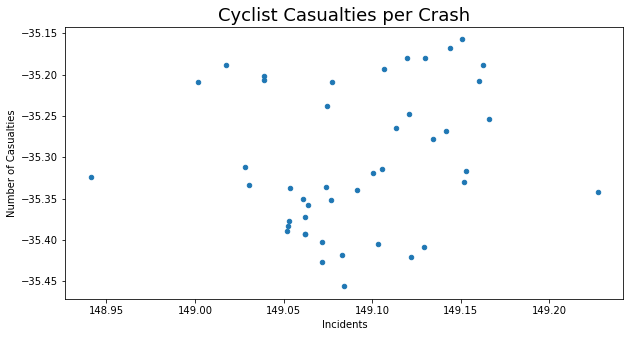

In [141]:
basketball_data.plot.scatter("LONGITUDE", "LATITUDE")

plt.title("Cyclist Casualties per Crash", fontsize=18)
plt.xlabel("Incidents", fontsize=10)
plt.ylabel("Number of Casualties", fontsize=10)

Text(0, 0.5, 'Number of Casualties')

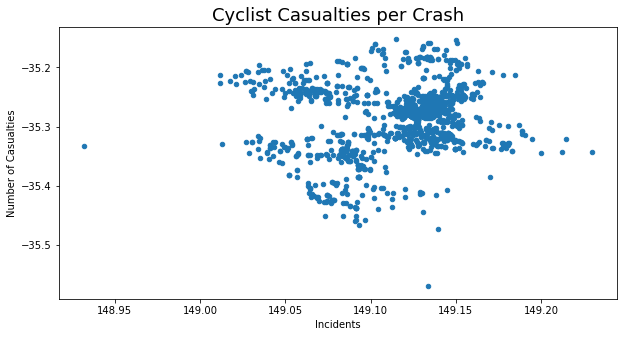

In [143]:
Cyclist_Crashes_data.plot.scatter("LONGITUDE", "LATITUDE")

plt.title("Cyclist Casualties per Crash", fontsize=18)
plt.xlabel("Incidents", fontsize=10)
plt.ylabel("Number of Casualties", fontsize=10)

The first scatterplot shows where the basketball courts are and the second scatterplot shows where the cyclist crasehs have occured.

Text(0, 0.5, 'Number of Casualties')

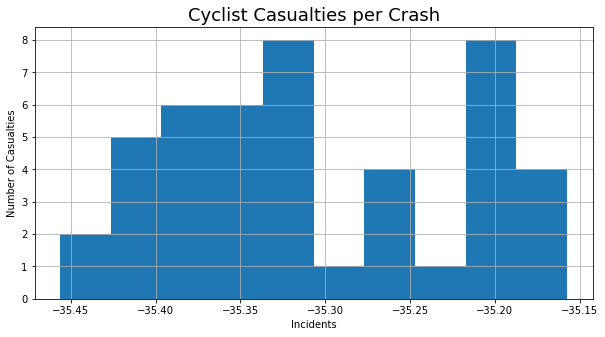

In [139]:
basketball_data["LATITUDE"].hist()

plt.title("Cyclist Casualties per Crash", fontsize=18)
plt.xlabel("Incidents", fontsize=10)
plt.ylabel("Number of Casualties", fontsize=10)

Text(0, 0.5, 'Number of Casualties')

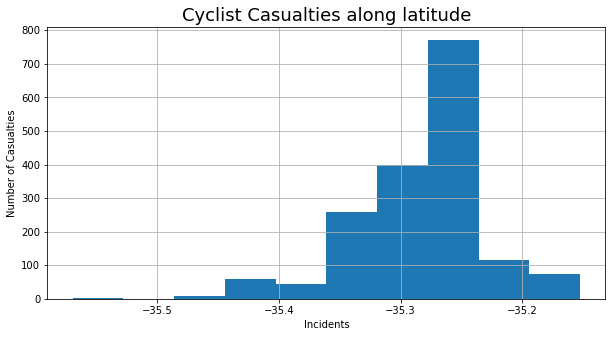

In [138]:
Cyclist_Crashes_data["LATITUDE"].hist()

plt.title("Cyclist Casualties along latitude", fontsize=18)
plt.xlabel("Incidents", fontsize=10)
plt.ylabel("Number of Casualties", fontsize=10)

Text(0, 0.5, 'Number of Casualties')

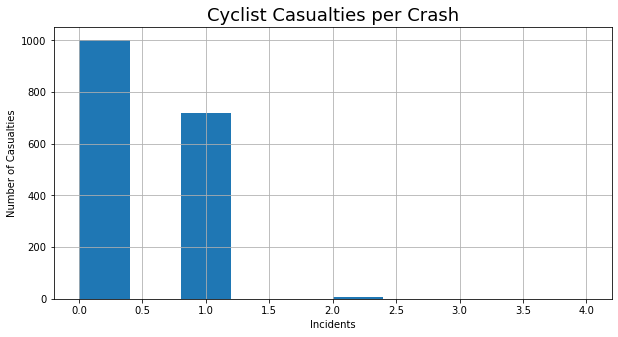

In [123]:
Cyclist_Crashes_data["CYCLIST_CASUALTIES"].hist()

plt.title("Cyclist Casualties per Crash", fontsize=18)
plt.xlabel("Incidents", fontsize=10)
plt.ylabel("Number of Casualties", fontsize=10)

This graph shows that most cyclist crashes usuallly involve 1 or less person and that it'll be rare to involve 2 casualties.

In [124]:
Cyclist_Crashes_data.groupby(pd.Grouper(key="CRASH_DATE")).mean()

,CRASH_ID,CYCLISTS,CYCLIST_CASUALTIES,LATITUDE,LONGITUDE
CRASH_DATE,,,,,
02 August 2019,1212158.0,1.0,1.0,-35.272927,149.135539
26 July 2019,1212104.5,1.0,0.5,-35.272886,149.133298
15 July 2018,1188323.0,1.0,0.0,-35.312936,149.082802
19 July 2018,1188961.0,1.0,0.0,-35.263355,149.135571
16 December 2019,1221090.0,1.0,0.0,-35.261346,149.133405
...,...,...,...,...,...
22 June 2018,1187118.0,1.0,0.5,-35.255578,149.137340
27 June 2018,1186930.0,1.0,1.0,-35.218244,149.130995
19 June 2018,1187169.0,1.0,0.0,-35.260263,149.130629


The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Text(0, 0.5, 'Number of Crashes')

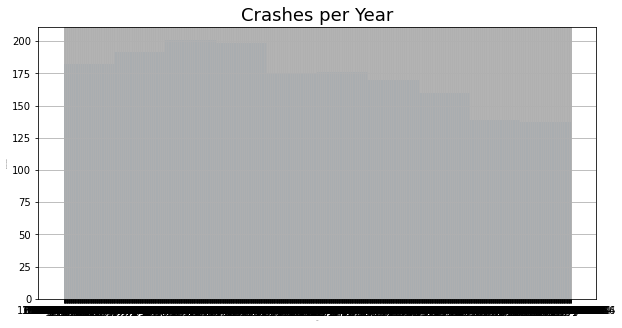

In [125]:
Cyclist_Crashes_data["CRASH_DATE"].hist()

plt.title("Crashes per Year", fontsize=18)
plt.xlabel("Year", fontsize=1)
plt.ylabel("Number of Crashes", fontsize=1)

This historgram shows the amount of cyclist crashes per year

<AxesSubplot:>

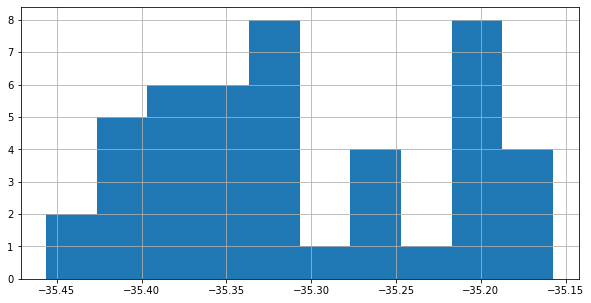

In [126]:
basketball_data.LATITUDE[basketball_data.LATITUDE < 149.10].hist() 

Number of Courts that are on the left half of ACT

<AxesSubplot:>

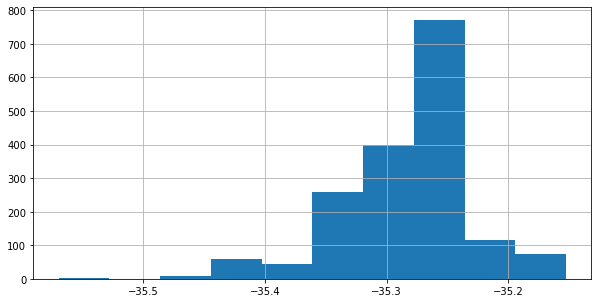

In [127]:
Cyclist_Crashes_data.LATITUDE[Cyclist_Crashes_data.LATITUDE < 149.10].hist() 

<AxesSubplot:>

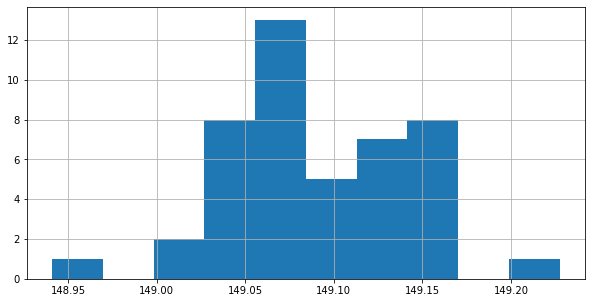

In [128]:
basketball_data["LONGITUDE"][basketball_data["LATITUDE"] < -30].hist()

Let's see what's under $1000

<AxesSubplot:>

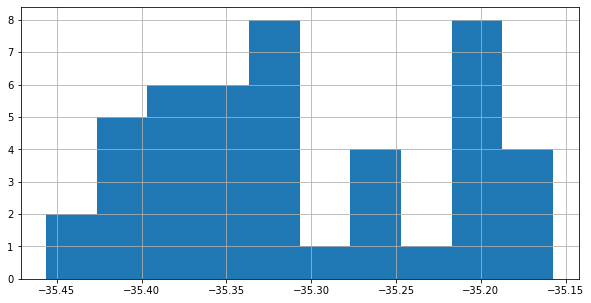

In [129]:
basketball_data["LATITUDE"][basketball_data["LATITUDE"] < -20].hist()